In [2]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.stats as st

In [3]:
filename = "resources/employers_clean.csv"
employers_df=pd.read_csv(filename)

In [4]:
employers_df.head()

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",3.8,Suwon
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",4.4,Redmond
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",4.2,Armonk
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",4.5,Mountain View
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",4.1,Cupertino


In [5]:
employers_reduced = employers_df[employers_df["TICKER"] != 'none'].reset_index(drop=True)

In [6]:
employers_reduced.head(24)

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",3.8,Suwon
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",4.4,Redmond
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",4.2,Armonk
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",4.5,Mountain View
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",4.1,Cupertino
5,6,Delta Air Lines,DAL,Transportation and Logistics,United States,"80,000",4.2,Atlanta
6,7,Costco Wholesale,COST,Retail and Wholesale,United States,"288,000",4.0,Issaquah
7,8,Adobe,ADBE,"IT, Internet, Software & Services",United States,"25,988",4.4,San Jose
8,9,Southwest Airlines,LUV,Transportation and Logistics,United States,"55,093",4.4,Dallas
9,10,Dell Technologies,DELL,"Semiconductors, Electronics, Electrical Engine...",United States,"133,000",4.3,Round Rock


In [ ]:
employers_reduced['1 year stock performance']=""
employers_reduced['return on equity']=""
employers_reduced['Analyst Recommendation Mean']=""
employers_reduced['Operating Income']=""


employers_reduced

In [70]:
print('Finding stock data..')
print("-"*20)
for index,row in employers_reduced.iterrows():
    company=employers_reduced.loc[index,'NAME']
    ticker=employers_reduced.loc[index,'TICKER']
    stock_data=yf.Ticker(ticker)
    try:
        employers_reduced.loc[index, "1 year stock performance"]=round(stock_data.info["52WeekChange"]*100,2)
        employers_reduced.loc[index, "return on equity"]=round(stock_data.info["returnOnEquity"]*100,2)
        employers_reduced.loc[index, "Analyst Recommendation Mean"]=stock_data.info['recommendationMean']
        employers_reduced.loc[index, 'Operating Income']=stock_data.info['ebitda']
    except:
        employers_reduced.loc[index, "1 year stock performance"]="No data found"
        employers_reduced.loc[index, "return on equity"]="No data found"
        employers_reduced.loc[index, "Analyst Recommendation Mean"]="No data found"
        employers_reduced.loc[index, "Operating Income"]="No data found"
        
    print(f"{company} ({ticker}): {employers_reduced.loc[index, '1 year stock performance']}% 1yr stock performance; {employers_reduced.loc[index, 'return on equity']}% RoE; Mean Analyst Rec: {employers_reduced.loc[index, 'Analyst Recommendation Mean']}; EBITDA: {employers_reduced.loc[index, 'Operating Income']}")
    print("-"*20)

employers_reduced

Finding stock data..
--------------------
Samsung Electronics (005930.KS): -23.07% 1yr stock performance; 13.29% RoE; Mean Analyst Rec: 1.8; EBITDA: 90943910838272
--------------------
Microsoft (MSFT): -27.89% 1yr stock performance; 42.88% RoE; Mean Analyst Rec: 1.8; EBITDA: 98841001984
--------------------
IBM (IBM): 8.04% 1yr stock performance; 6.48% RoE; Mean Analyst Rec: 2.5; EBITDA: 12010000384
--------------------
Alphabet (GOOG): -37.04% 1yr stock performance; 26.89% RoE; Mean Analyst Rec: 1.5; EBITDA: 93733003264
--------------------
Apple (AAPL): -25.66% 1yr stock performance; 175.46% RoE; Mean Analyst Rec: 2.0; EBITDA: 130541002752
--------------------
Delta Air Lines (DAL): -10.82% 1yr stock performance; 2.25% RoE; Mean Analyst Rec: 1.7; EBITDA: 4472000000
--------------------
Costco Wholesale (COST): -8.29% 1yr stock performance; 29.32% RoE; Mean Analyst Rec: 2.1; EBITDA: 9648000000
--------------------
Adobe (ADBE): -35.46% 1yr stock performance; 32.97% RoE; Mean Analyst 

Naver (035420.KS): -41.34% 1yr stock performance; 3.47% RoE; Mean Analyst Rec: 2.0; EBITDA: 1706498850816
--------------------
Meritz Financial Group (008560.KS): 3.45% 1yr stock performance; 15.53% RoE; Mean Analyst Rec: 2.0; EBITDA: None
--------------------
Discover Financial Services (DFS): -19.21% 1yr stock performance; 32.13% RoE; Mean Analyst Rec: 2.5; EBITDA: None
--------------------
Sony (SONY): -34.59% 1yr stock performance; 13.46% RoE; Mean Analyst Rec: 1.2; EBITDA: 2016487014400
--------------------
Novartis (NVS): 0.09% 1yr stock performance; 36.99% RoE; Mean Analyst Rec: 2.2; EBITDA: 19399999488
--------------------
The Hartford (HIG): 6.15% 1yr stock performance; 12.69% RoE; Mean Analyst Rec: 1.9; EBITDA: 3324000000
--------------------
SK Group (034730.KS): -19.21% 1yr stock performance; 11.65% RoE; Mean Analyst Rec: 1.5; EBITDA: 17794473132032
--------------------
De'Longhi (DLG.MI): -26.33% 1yr stock performance; 11.61% RoE; Mean Analyst Rec: 2.5; EBITDA: 321176000
-

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City,1 year stock performance,return on equity,Analyst Recommendation Mean,Operating Income
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",3.8,Suwon,-23.07,13.29,1.8,90943910838272
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",4.4,Redmond,-27.89,42.88,1.8,98841001984
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",4.2,Armonk,8.04,6.48,2.5,12010000384
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",4.5,Mountain View,-37.04,26.89,1.5,93733003264
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",4.1,Cupertino,-25.66,175.46,2.0,130541002752
...,...,...,...,...,...,...,...,...,...,...,...,...
80,95,DBS Bank,D05.SI,Banking and Financial Services,Singapore,"33,000",3.9,Singapore,-0.48,11.79,2.0,None
81,96,Mastercard,MA,Banking and Financial Services,United States,"24,000",4.3,Purchase,1.28,147.74,1.8,13080000512
82,97,Electricite de France,EDF.PA,Utilities,France,"167,157",4.0,Paris,18.28,-6.42,2.6,7233999872
83,98,Verbund,VER.VI,Utilities,Austria,"3,184",4.7,Vienna,-19.13,26.71,3.2,2274543104


In [103]:
employers_reduced["Operating Income"].astype(str)
employers_filter=employers_reduced.dropna(axis=0,how='any')
employers_filter["Operating Income"].astype(int)
employers_filter["EMPLOYEES"]=employers_filter["EMPLOYEES"].str.replace(',', '').astype(int)


/Users/gavinpayne/opt/anaconda3/envs/PythonData2/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City,1 year stock performance,return on equity,Analyst Recommendation Mean,Operating Income
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,266673,3.8,Suwon,-23.07,13.29,1.8,9.094391e+13
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,221000,4.4,Redmond,-27.89,42.88,1.8,9.884100e+10
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,250000,4.2,Armonk,8.04,6.48,2.5,1.201000e+10
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,156500,4.5,Mountain View,-37.04,26.89,1.5,9.373300e+10
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,154000,4.1,Cupertino,-25.66,175.46,2.0,1.305410e+11
...,...,...,...,...,...,...,...,...,...,...,...,...
79,94,De'Longhi,DLG.MI,"Engineering, Manufacturing",Italy,10000,4.0,Treviso,-26.33,11.61,2.5,3.211760e+08
81,96,Mastercard,MA,Banking and Financial Services,United States,24000,4.3,Purchase,1.28,147.74,1.8,1.308000e+10
82,97,Electricite de France,EDF.PA,Utilities,France,167157,4.0,Paris,18.28,-6.42,2.6,7.234000e+09
83,98,Verbund,VER.VI,Utilities,Austria,3184,4.7,Vienna,-19.13,26.71,3.2,2.274543e+09


In [120]:
employers_filter["Operating income per employee"]=employers_filter["Operating Income"]/employers_filter["EMPLOYEES"]
pd.options.display.float_format = '{:,.2f}'.format
employers_filter

/Users/gavinpayne/opt/anaconda3/envs/PythonData2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City,1 year stock performance,return on equity,Analyst Recommendation Mean,Operating Income,Operating income per employee,stock_z,roe_z
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,266673,3.80,Suwon,-23.07,13.29,1.80,"90,943,910,838,272.00","341,031,566.14",-0.29,-0.20
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,221000,4.40,Redmond,-27.89,42.88,1.80,"98,841,001,984.00","447,244.35",-0.53,-0.03
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,250000,4.20,Armonk,8.04,6.48,2.50,"12,010,000,384.00","48,040.00",1.29,-0.24
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,156500,4.50,Mountain View,-37.04,26.89,1.50,"93,733,003,264.00","598,932.93",-0.99,-0.12
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,154000,4.10,Cupertino,-25.66,175.46,2.00,"130,541,002,752.00","847,668.85",-0.42,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,94,De'Longhi,DLG.MI,"Engineering, Manufacturing",Italy,10000,4.00,Treviso,-26.33,11.61,2.50,"321,176,000.00","32,117.60",-0.45,-0.21
81,96,Mastercard,MA,Banking and Financial Services,United States,24000,4.30,Purchase,1.28,147.74,1.80,"13,080,000,512.00","545,000.02",0.95,0.57
82,97,Electricite de France,EDF.PA,Utilities,France,167157,4.00,Paris,18.28,-6.42,2.60,"7,233,999,872.00","43,276.68",1.81,-0.31
83,98,Verbund,VER.VI,Utilities,Austria,3184,4.70,Vienna,-19.13,26.71,3.20,"2,274,543,104.00","714,366.55",-0.09,-0.12


In [121]:
stock = employers_filter['1 year stock performance'].astype(float)
stock_z=st.zscore(stock)

employers_filter['stock_z']=stock_z

roe= employers_filter['return on equity'].astype(float)
roe_z=st.zscore(roe)

employers_filter['roe_z']=roe_z

/Users/gavinpayne/opt/anaconda3/envs/PythonData2/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/gavinpayne/opt/anaconda3/envs/PythonData2/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [130]:
employers_filter.head(6)

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City,1 year stock performance,return on equity,Analyst Recommendation Mean,Operating Income,Operating income per employee,stock_z,roe_z
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,266673,3.80,Suwon,-23.07,13.29,1.80,"90,943,910,838,272.00","341,031,566.14",-0.29,-0.20
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,221000,4.40,Redmond,-27.89,42.88,1.80,"98,841,001,984.00","447,244.35",-0.53,-0.03
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,250000,4.20,Armonk,8.04,6.48,2.50,"12,010,000,384.00","48,040.00",1.29,-0.24
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,156500,4.50,Mountain View,-37.04,26.89,1.50,"93,733,003,264.00","598,932.93",-0.99,-0.12
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,154000,4.10,Cupertino,-25.66,175.46,2.00,"130,541,002,752.00","847,668.85",-0.42,0.72
5,6,Delta Air Lines,DAL,Transportation and Logistics,United States,80000,4.20,Atlanta,-10.82,2.25,1.70,"4,472,000,000.00","55,900.00",0.34,-0.26


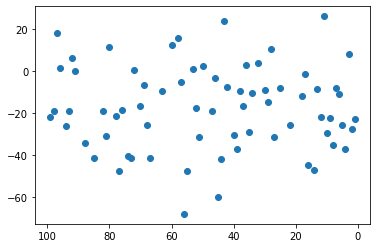

In [123]:
plt.scatter(employers_filter['RANK'],employers_filter['1 year stock performance'])
plt.gca().invert_xaxis()
plt.show()

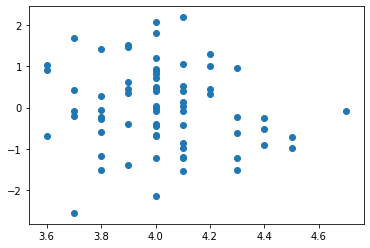

In [124]:
plt.scatter(employers_filter['Glassdoor Rating'],employers_filter['stock_z'])
plt.show()

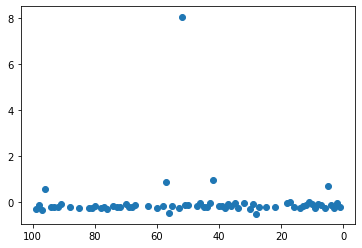

In [125]:
plt.scatter(employers_filter['RANK'],employers_filter['roe_z'])
plt.gca().invert_xaxis()
plt.show()

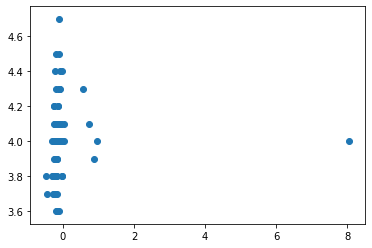

In [126]:
plt.scatter(employers_filter['roe_z'],employers_filter['Glassdoor Rating'])
plt.show()

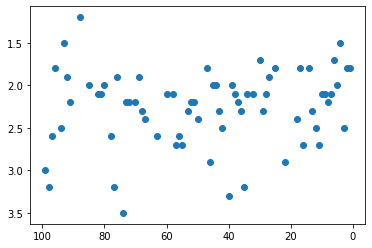

In [129]:
plt.scatter(employers_filter['RANK'],employers_filter['Analyst Recommendation Mean'])
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

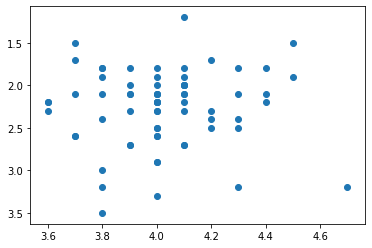

In [131]:
plt.scatter(employers_filter['Glassdoor Rating'],employers_filter['Analyst Recommendation Mean'])
plt.gca().invert_yaxis()
plt.show

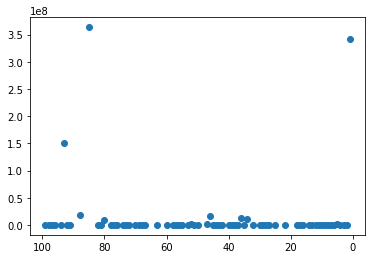

In [133]:
plt.scatter(employers_filter['RANK'],employers_filter['Operating income per employee'])
plt.gca().invert_xaxis()
plt.show()

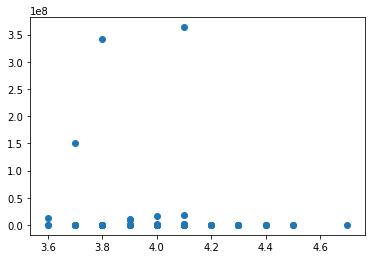

In [135]:
plt.scatter(employers_filter['Glassdoor Rating'],employers_filter['Operating income per employee'])
plt.show()